# Customer Churn Prediction for a Telecommunication Company

## Project Overview

In this Project, we will predict customer churn for a telecommunications company using a real-world dataset. The goal is to create a machine learning model that can accurately predict whether a customer will churn or not based on various customer attributes and usage patterns.

#### Problem Definition and Bussiness Understanding

Problem :  Predict customer churn.<br>
Bussiness Goals :  Reduce customer churn to increase revenue and customer Satisfaction.<br>
Scope :  Using historical customer data to build a predictive model.

#### Data Collection

Dataset :  We are using the Telco Customer Churn dataset from Kaggle. <br>
link :  https://www.kaggle.com/blastchar/telco-customer-churn

#### Data Preprocessing and Exploration

In [1]:
import pandas as pd
import random

In [2]:
# Loading the dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Randomly sample 10% of the data
data = data.sample(frac=0.1, random_state=42)

# Explore the Data
print(data.head())
print(data.info())
print(data.describe())


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
185   1024-GUALD  Female              0     Yes         No       1   
2715  0484-JPBRU    Male              0      No         No      41   
3825  3620-EHIMZ  Female              0     Yes        Yes      52   
1807  6910-HADCM  Female              0      No         No       1   
132   8587-XYZSF    Male              0      No         No      67   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
185            No  No phone service             DSL                   No  ...   
2715          Yes               Yes              No  No internet service  ...   
3825          Yes                No              No  No internet service  ...   
1807          Yes                No     Fiber optic                   No  ...   
132           Yes                No             DSL                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
185                  

#### Data Cleaning and Preprocessing

In [3]:
# Handling missing values (if any)
data.dropna(inplace=True)

In [4]:
# Feature Engineering
data['Churn'] = data['Churn'].map({'Yes' : 1, 'No' : 0})

In [5]:
# # Encode categorical variables using one-hot encoding
# data = pd.get_dummies(data, columns=['gender', 'Contract', 'PaymentMethod'], drop_first=True)

# Explicitly setting data type of categorical columns to CategoricalDtype
categorical_columns = ['gender', 'Contract', 'PaymentMethod']
for col in categorical_columns:
    data[col] = data[col].astype('category')

# Encoding categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


#### Data Visualization and EDA

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

D:\Jay\Data Science\dataScience\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Jay\Data Science\dataScience\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Jay\Data Science\dataScience\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


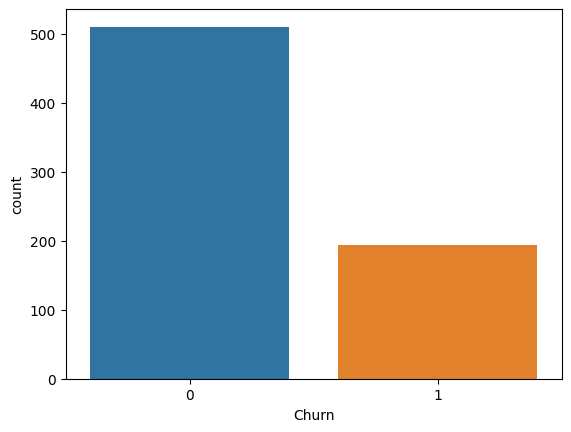

In [7]:
# Exploring relationships and visualize data
sns.countplot(x='Churn', data = data)
plt.show()

In [8]:
# Visualize coerrelations between features
# correlation_matrix = data.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.show()

data_sample = data.sample(frac=0.1, random_state=42)

# Dropping non-numeric columns before calculating the correlation matrix
data_numeric = data_sample.drop(['customerID', 'Churn'], axis=1)

In [9]:
# Encoding categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data_numeric)

In [10]:
# Calculating the correlation matrix for numeric columns only
correlation_matrix = data_encoded.corr()

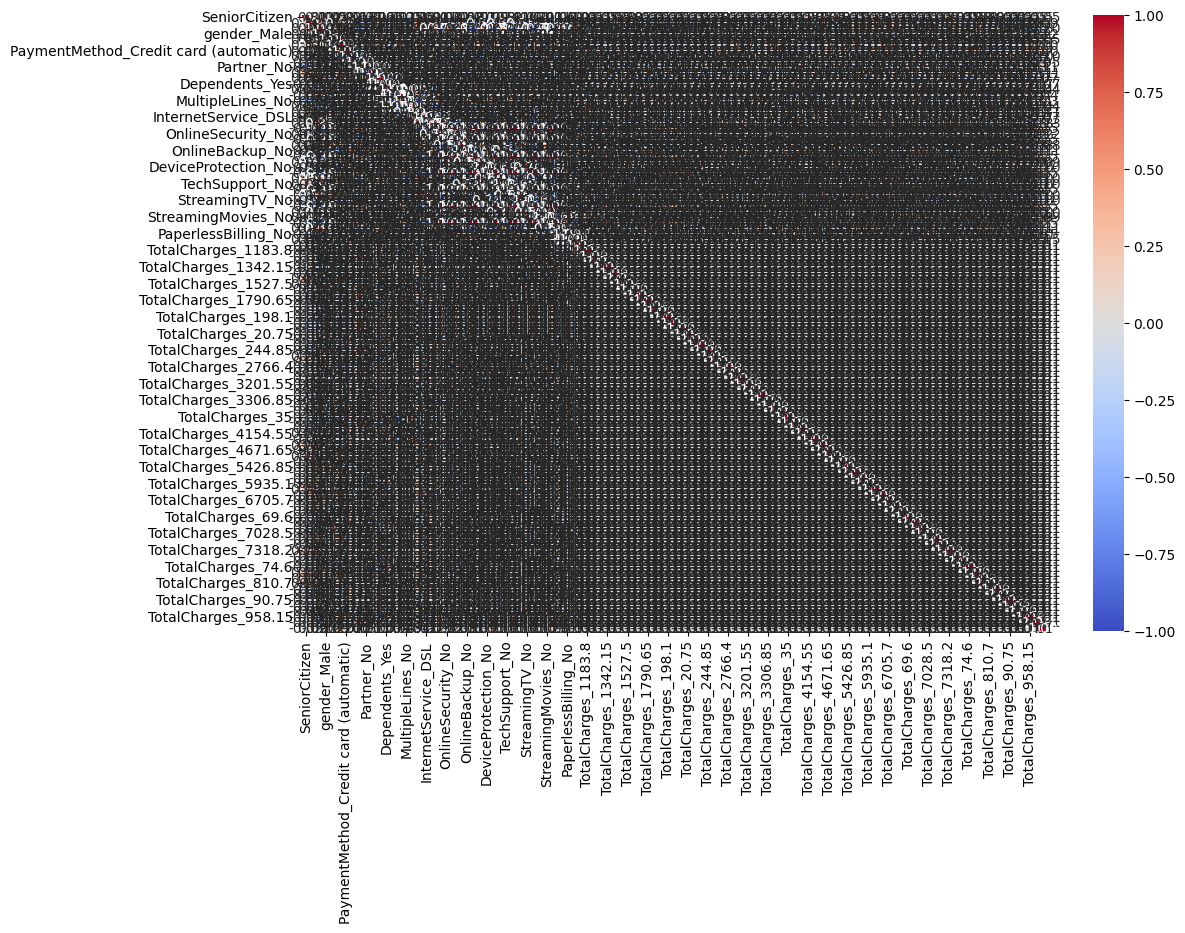

In [11]:
Visualizing correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

#### Model Development

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [13]:
# Creating a label encoder object
label_encoder = LabelEncoder()

In [14]:
# Applying label encoding to a binary categorical column
data['Churn'] = label_encoder.fit_transform(data['Churn'])
data = data.fillna(-999)

In [15]:
print(data['Churn'].unique())
print(data.dtypes)

[1 0]
customerID                                object
SeniorCitizen                              int64
Partner                                   object
Dependents                                object
tenure                                     int64
PhoneService                              object
MultipleLines                             object
InternetService                           object
OnlineSecurity                            object
OnlineBackup                              object
DeviceProtection                          object
TechSupport                               object
StreamingTV                               object
StreamingMovies                           object
PaperlessBilling                          object
MonthlyCharges                           float64
TotalCharges                              object
Churn                                      int64
gender_Male                                 bool
Contract_One year                           bool
Contract_Two y

In [16]:
# Converting 'TotalCharges' to numeric, errors='coerce' will convert non-numeric values to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Checking for any missing values (NaN) in the 'TotalCharges' column
missing_values = data['TotalCharges'].isnull().sum()
print(f"Number of missing values in 'TotalCharges' : {missing_values}")

Number of missing values in 'TotalCharges' : 0


In [22]:
# Splitting the data into training and testing sets

X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Perform one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split the encoded data into training and testing sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [24]:
# Train your model on the encoded data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_encoded, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Evaluating the Model
y_pred = model.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy : {accuracy}')
print(f'Confusion Matrix : \n {conf_matrix}')
print(f'Classification Report : \n {classification_rep}')

Accuracy : 0.7659574468085106
Confusion Matrix : 
 [[88  6]
 [27 20]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.94      0.84        94
           1       0.77      0.43      0.55        47

    accuracy                           0.77       141
   macro avg       0.77      0.68      0.70       141
weighted avg       0.77      0.77      0.74       141



In [21]:
# 